In [48]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from sklearn.decomposition import PCA

In [49]:
# Setting the plotting defaults
# plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (20, 12)


## 1.	Apply K means clustering in this data set provided below:

In [50]:
# load the data
df = pd.read_csv("CC.csv", index_col = 0)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [51]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [52]:
# Range in target values
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [53]:
# Null values in the dataframe
null_values = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
null_values.columns=['Total_Number_Of_Null_Values'] 
null_values.index.name = 'Feature'
null_values

,Total_Number_Of_Null_Values
Feature,
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
TENURE,0
PURCHASES_FREQUENCY,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0


#### a.  Remove any null values by the mean.

In [54]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()== True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()== True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [56]:
# features (data without the target value)
data = df.drop('TENURE', axis = 1)
print("Dimension of the dataset:\n",data.shape)
print("\nColumn names:\n",data.columns)

Dimension of the dataset:
 (8950, 16)

Column names:
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')


#### b. Use the elbow method to find a good number of clusters with the KMeans algorithm

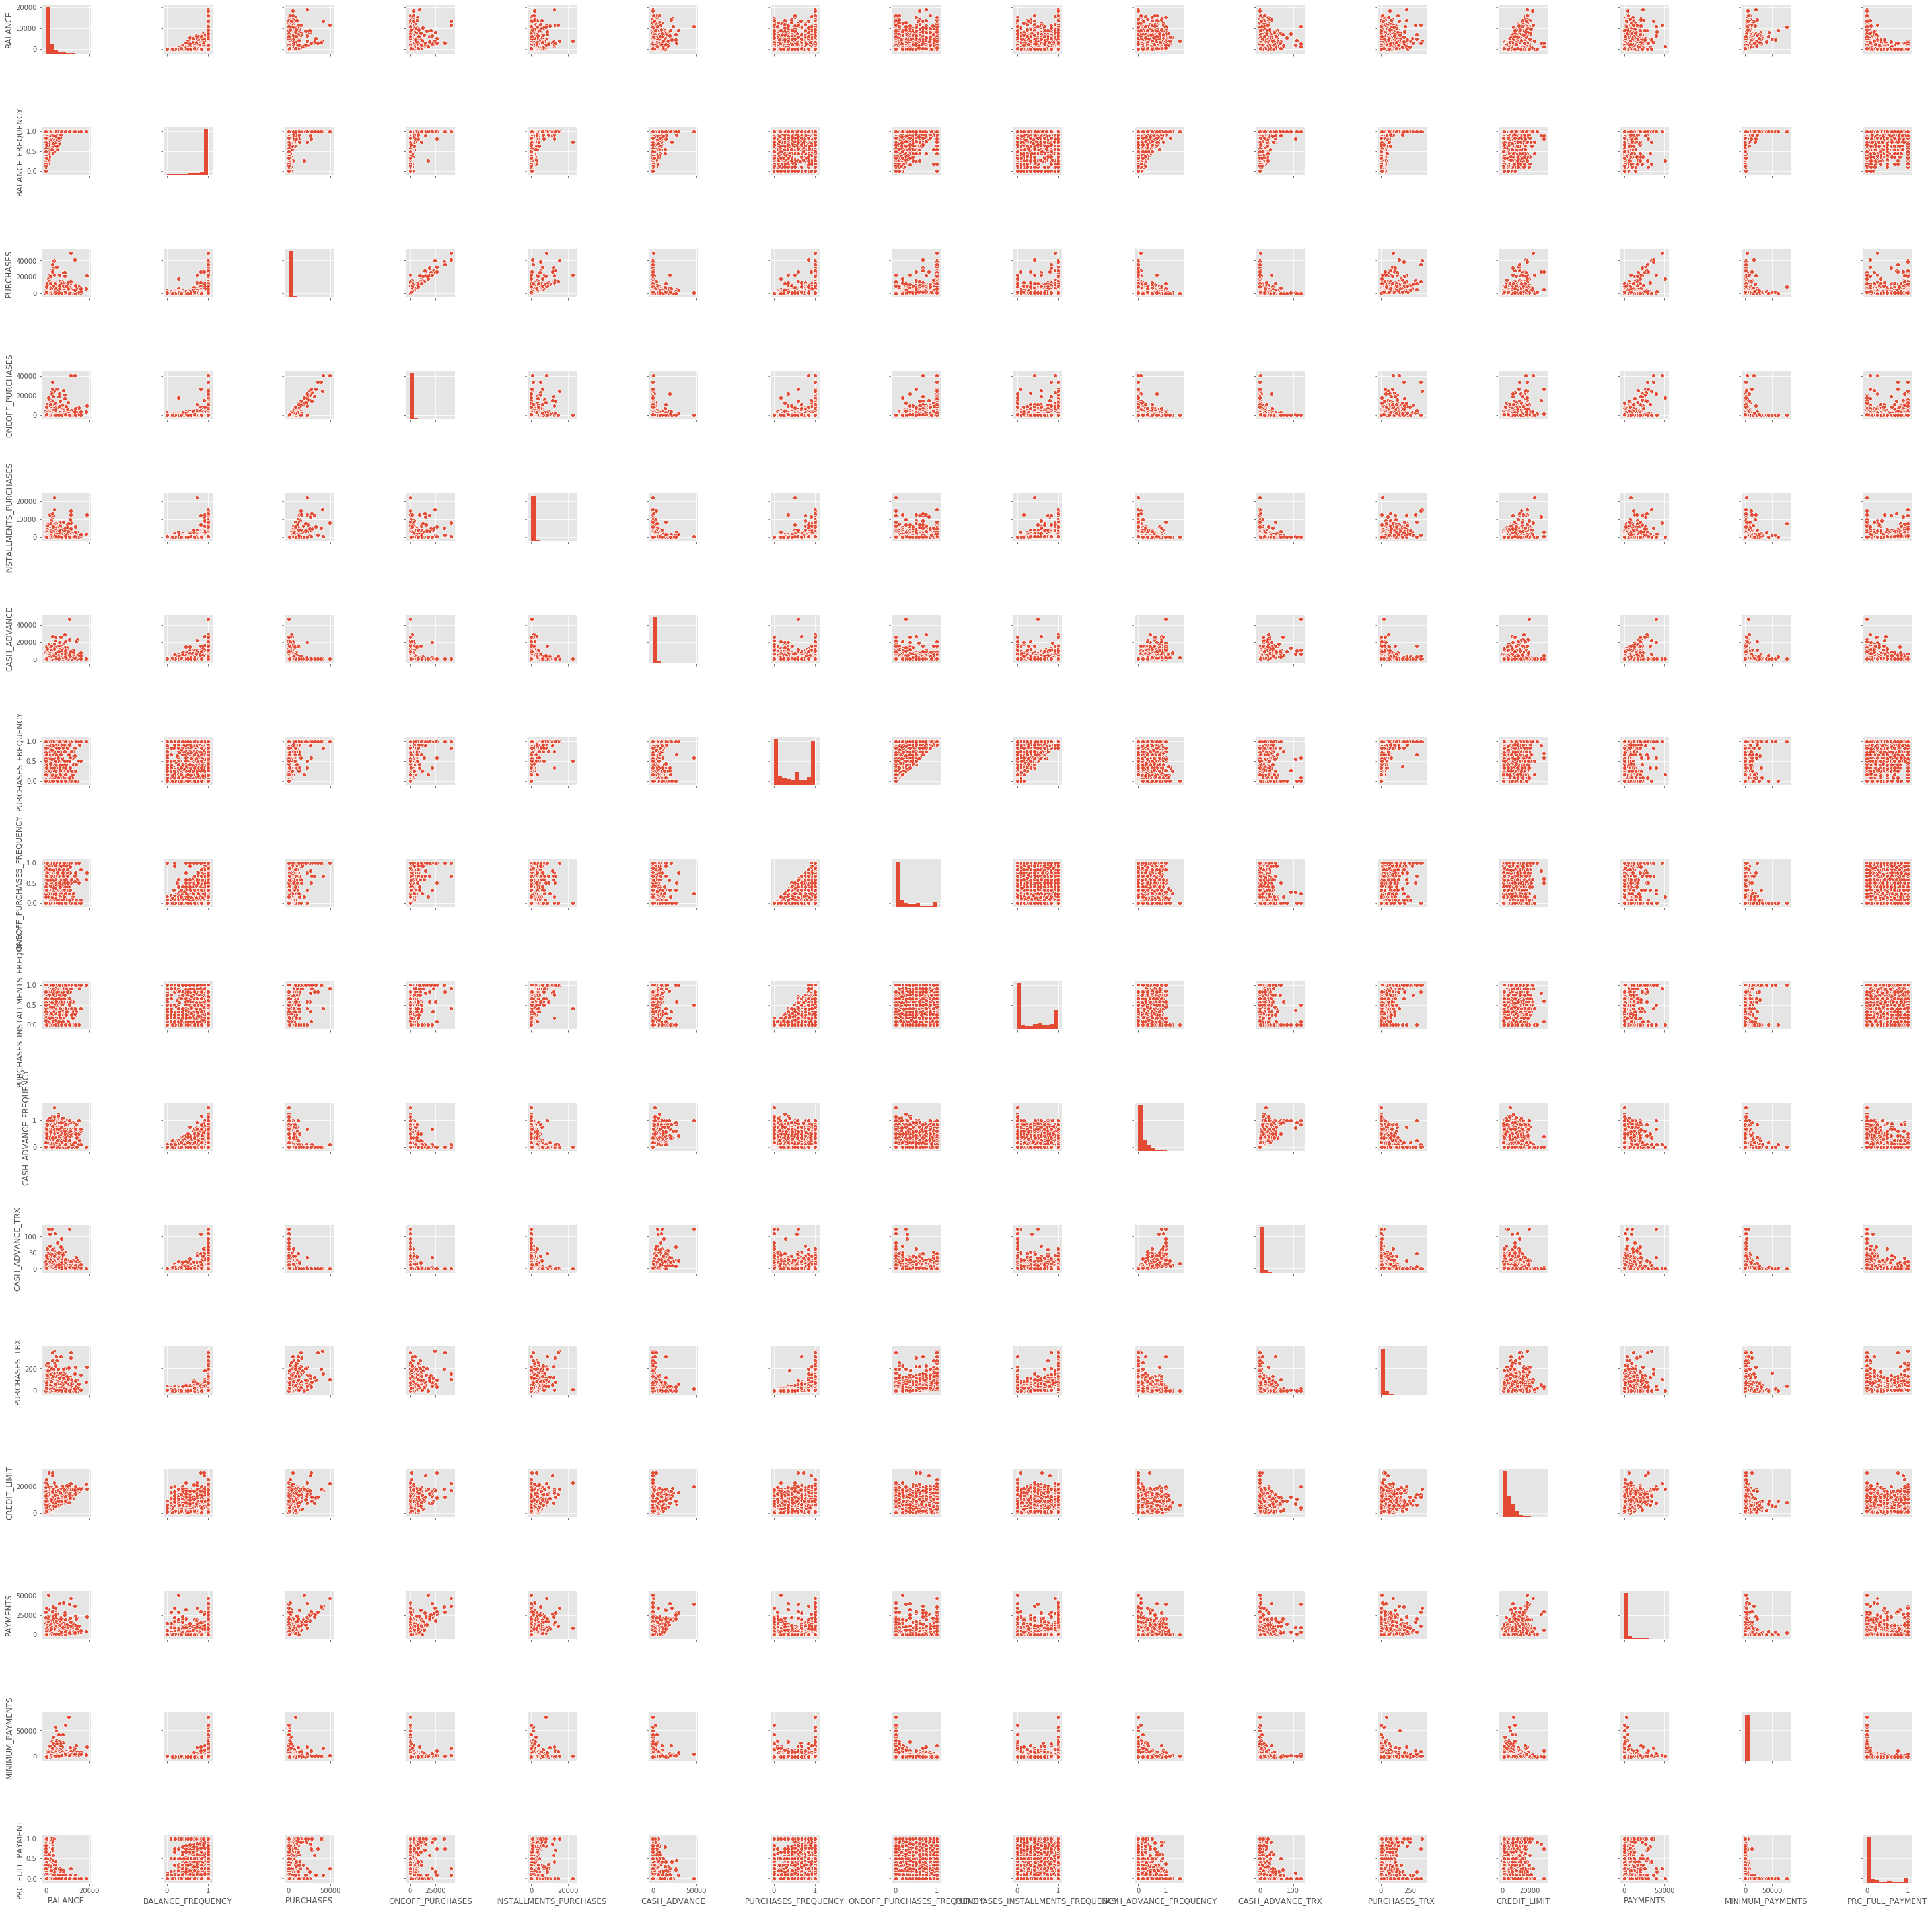

In [57]:
# Let's see the pairplots to see the correlation among features and histogram of the features in the diagonal
sns.pairplot(data)

##### elbow method to know the number of clusters

In [58]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=0)
    #kmeans = KMeans(n_clusters=i, max_iter=300,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss

[393060974446.5349,
 279296567206.891,
 232802790206.94107,
 206553461523.41586,
 182427559015.364,
 161691626238.03812,
 145207112292.8114,
 132878111013.58641,
 124180124766.80826]

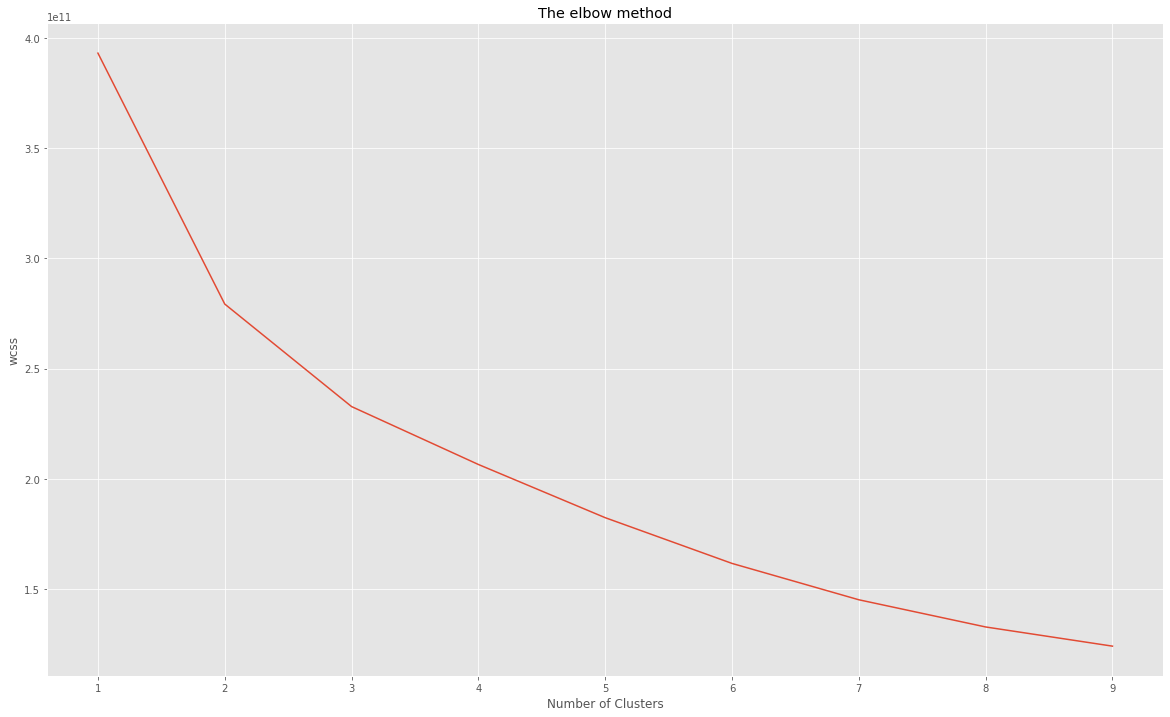

In [59]:
plt.plot(np.arange(1,10), wcss)
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss");


## 2.	Calculate the silhouette score for the above clustering

In [60]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
print("The shape of cluster centorids   : ", kmeans.cluster_centers_.shape)
print("The shape of the estimated labels: ", kmeans.labels_.shape)
print("The silhouette score for the above clusterings: ", metrics.silhouette_score(data, kmeans.labels_))


The shape of cluster centorids   :  (3, 16)
The shape of the estimated labels:  (8950,)
The silhouette score for the above clusterings:  0.4654853574746247


In [62]:
# ALternative to estimating the silhoutte score
pred = kmeans.predict(data)
metrics.silhouette_score(data, pred)

0.4654853574746247

## 3.	Try feature scaling to see if it will improve the Silhouette score

In [63]:
scaler = preprocessing.StandardScaler()
#scaler.fit(data)
#data_scaled_array = scaler.transform(data)
data_scaled_array = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled_array, columns= data.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551


In [64]:
kmeans_with_scaled_features = KMeans(n_clusters=3)
kmeans_with_scaled_features.fit(data_scaled)
print("The shape of cluster centorids   : ", kmeans_with_scaled_features.cluster_centers_.shape)
print("The shape of the estimated labels: ", kmeans_with_scaled_features.labels_.shape)
print("The silhouette score after scaling the features: ", metrics.silhouette_score(data_scaled, kmeans_with_scaled_features.labels_))

The shape of cluster centorids   :  (3, 16)
The shape of the estimated labels:  (8950,)
The silhouette score after scaling the features:  0.2672161762428284


## 4.	Apply PCA on the same dataset.

In [71]:
pca = PCA(2)
data_pca = pca.fit_transform(data_scaled)
data_scaled_pca = pd.DataFrame(data=data_pca, index = df.index)
data_scaled_pca.head()


,0,1
CUST_ID,,
C10001,-1.718893,-1.072938
C10002,-1.169307,2.509325
C10003,0.938415,-0.382605
C10004,-0.907503,0.045863
C10005,-1.637830,-0.684975


## Bonus points


### 1.	Apply kmeans algorithm on the PCA result and report your observation if the score improved or not?


#### a.	You can try different variation like PCA+KMEANS , SCALING+PCA+KMEANS. 

#### SCALING+PCA+KMEANS

In [66]:
kmeans_with_scaled_features_with_pca = KMeans(n_clusters=3)
kmeans_with_scaled_features_with_pca.fit(data_scaled_pca)
print("The shape of cluster centorids   : ", kmeans_with_scaled_features_with_pca.cluster_centers_.shape)
print("The shape of the estimated labels: ", kmeans_with_scaled_features_with_pca.labels_.shape)
print("The silhouette score after scaling and PCA : ", metrics.silhouette_score(data_scaled_pca, kmeans_with_scaled_features_with_pca.labels_))

The shape of cluster centorids   :  (3, 2)
The shape of the estimated labels:  (8950,)
The silhouette score after scaling and PCA :  0.453320296650346


#### 2.	Visualization

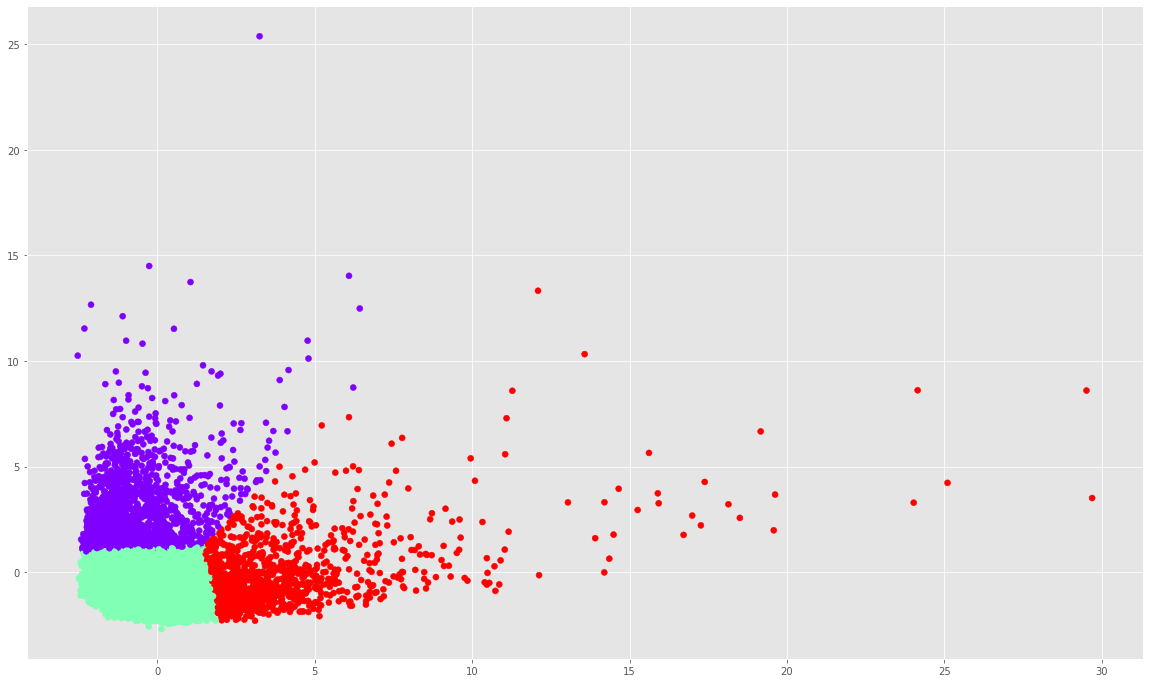

In [67]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=kmeans_with_scaled_features_with_pca.labels_, cmap='rainbow');


#### PCA+KMEANS

In [68]:
pca = PCA(2)
data_pca_without_scaling = pca.fit_transform(data)
df3 = pd.DataFrame(data=data_pca_without_scaling, index = df.index)
df3.head()

,0,1
CUST_ID,,
C10001,-4326.383979,921.566882
C10002,4118.916665,-2432.846346
C10003,1497.907641,-1997.578694
C10004,1394.548536,-1488.743453
C10005,-3743.351896,757.342657


In [69]:
kmeans_pca_without_scaling = KMeans(n_clusters=3)
kmeans_pca_without_scaling.fit(df3)
metrics.silhouette_score(data_pca_without_scaling, kmeans_pca_without_scaling.labels_)
print("The shape of cluster centorids   : ", kmeans_pca_without_scaling.cluster_centers_.shape)
print("The shape of the estimated labels: ", kmeans_pca_without_scaling.labels_.shape)
print("The silhouette score after scaling and PCA : ", metrics.silhouette_score(data_pca_without_scaling, kmeans_pca_without_scaling.labels_))

The shape of cluster centorids   :  (3, 2)
The shape of the estimated labels:  (8950,)
The silhouette score after scaling and PCA :  0.572000315900709


#### Visualization

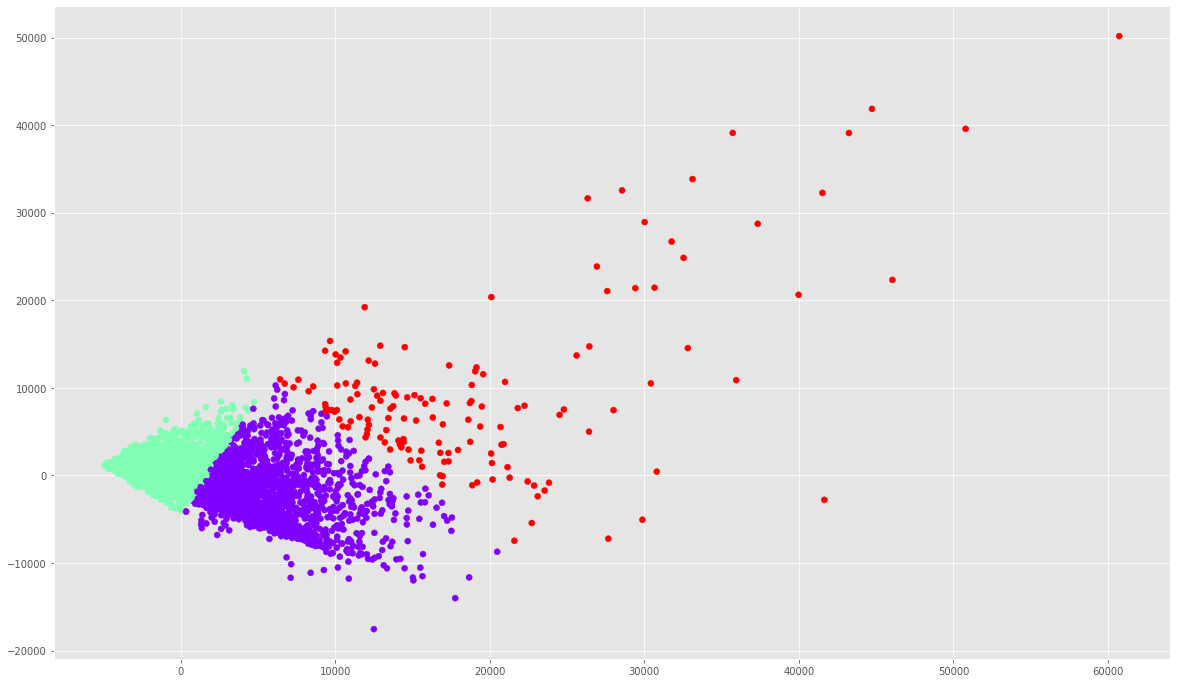

In [70]:
plt.scatter(data_pca_without_scaling[:,0], data_pca_without_scaling[:,1], c=kmeans_pca_without_scaling.labels_, cmap='rainbow');